In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='ticks')

In [2]:
from matplotlib.gridspec import GridSpec

In [3]:
from sklearn.preprocessing import RobustScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
from sklearn.grid_search import GridSearchCV
from collections import Counter
from sklearn import metrics
import time

/Users/suyashchavan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/Users/suyashchavan/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/suyashchavan/anaconda3/lib/python3.7/site-packages/sklearn/grid_search.py:14: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mappin

In [4]:
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.combine import SMOTEENN

In [5]:
pd.options.display.float_format = '{:,.4f}'.format

### Methodology
1. __Loading the Data__ :<br>
The dataset given in the problem is an highly imbalanced having 0's as the majority class (99.83%) and 1's as the minority class (0.17%).
<br>
***
2. __Feature Selection__:<br>
Data Preprocessing with RobustScaler, then Identified features which are important by assessing their correlation with the response: I found that very few features had a strong correlation with the response.

***
3. __Builing Classification Function__:<br>
We Will build the classification Function with hyperparameter tuning which we will apply on dataset after resampling i.e.Step 4
***
4. __Resampling__:<br>
To combat the imabalance in the dataset, I have used resampling techniques. Resampling aims to balance the ratio between the classes of the data. For binary classification, it can either be performed by duplicating samples of minority class(Oversampling) or by eliminating samples of majority class(Undersampling).
Resampling techniques used here are:  RUS(Random Under Sampling),NearMiss,ROS(Random Over Sampling),SMOTE, SMOTEENN
Each resampling method is used with 2/3 Ratio: (minority 1/0 majority).
Resampling of the training data thus resulted in 5 training datasets (1 RUS,1 NearMiss,1 ROS,1 SMOTE,1 SMOTEENN )
***
5. __Training & Evaluation of Classification Models__:<br>
All train datasets (5 in total) were used to train learnable classification methods of three different kinds: Logistic Regression (LR), Random Forest (RF), Support Vector Machine(SVM) Thus, a total of 12 models were trained(Because of computation limit only undersampling models with SVM are trained).

## 1.1 Loading the Data

In [6]:
Fraud_df = pd.read_csv('creditcard.csv')
Fraud_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0000,-1.3598,-0.0728,2.5363,1.3782,-0.3383,0.4624,0.2396,0.0987,0.3638,...,-0.0183,0.2778,-0.1105,0.0669,0.1285,-0.1891,0.1336,-0.0211,149.6200,0
1,0.0000,1.1919,0.2662,0.1665,0.4482,0.0600,-0.0824,-0.0788,0.0851,-0.2554,...,-0.2258,-0.6387,0.1013,-0.3398,0.1672,0.1259,-0.0090,0.0147,2.6900,0
2,1.0000,-1.3584,-1.3402,1.7732,0.3798,-0.5032,1.8005,0.7915,0.2477,-1.5147,...,0.2480,0.7717,0.9094,-0.6893,-0.3276,-0.1391,-0.0554,-0.0598,378.6600,0
3,1.0000,-0.9663,-0.1852,1.7930,-0.8633,-0.0103,1.2472,0.2376,0.3774,-1.3870,...,-0.1083,0.0053,-0.1903,-1.1756,0.6474,-0.2219,0.0627,0.0615,123.5000,0
4,2.0000,-1.1582,0.8777,1.5487,0.4030,-0.4072,0.0959,0.5929,-0.2705,0.8177,...,-0.0094,0.7983,-0.1375,0.1413,-0.2060,0.5023,0.2194,0.2152,69.9900,0


In [7]:
#Checking the Data-type
Fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

__All the Datatypes are as required ,also data has no null values.__

__I am also interested in at what hour of the day transaction took place__

In [8]:
time = pd.to_datetime(Fraud_df['Time'],unit='s')
Fraud_df['hour'] = time.apply(lambda x:x.hour)

## 1.2 Target Class Distribution

In [9]:
Target_dist =  pd.DataFrame(Fraud_df['Class'].value_counts())
Target_dist['Case'] = ['Non-Fraud','Fraud']
Target_dist = Target_dist.set_index('Case')
Target_dist

,Class
Case,
Non-Fraud,284315
Fraud,492


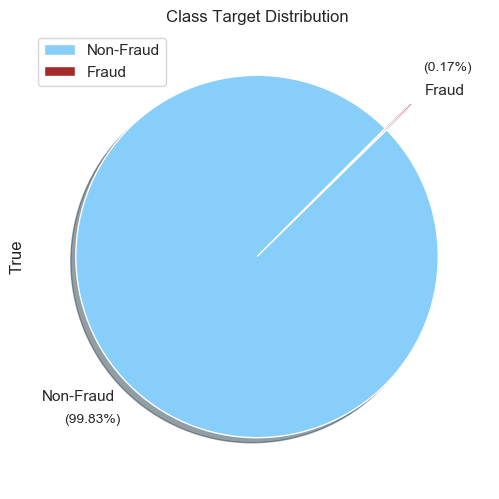

In [10]:
plt.figure(dpi=100)
explode_list=[0.0,0.2]
color_list = ['lightskyblue','brown']
Target_dist['Class'].plot(kind='pie',
                      figsize=(10,6),
                      autopct='(%1.2f%%)',
                      startangle = 45,
                      shadow = True,
                      label = True,
                      colors = color_list,
                      pctdistance = 1.28,
                      explode = explode_list)
plt.title('Class Target Distribution')
plt.legend(Target_dist.index,loc = 'upper left')

__This is Highly imbalanced data with only 0.17% cases from minority class(Class:1)__

/Users/suyashchavan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0.0, 2125.87)

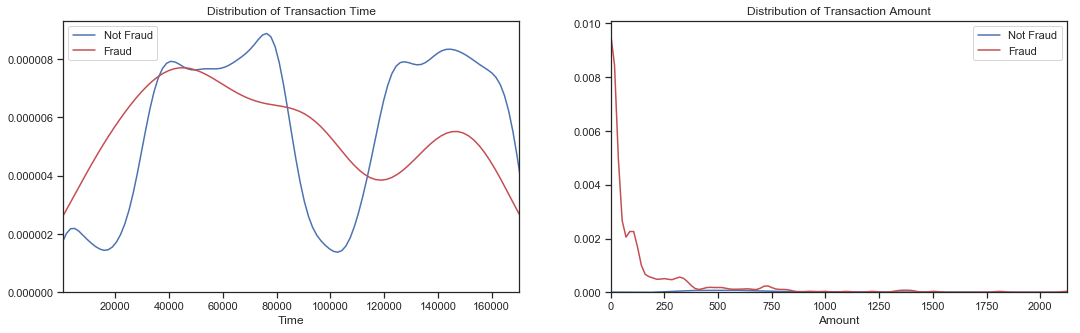

In [11]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(18,5))

ct0 = Fraud_df[Fraud_df['Class']==0]['Time']
ct1 = Fraud_df[Fraud_df['Class']==1]['Time']
ca0 = Fraud_df[Fraud_df['Class']==0]['Amount']
ca1 = Fraud_df[Fraud_df['Class']==1]['Amount']

sns.distplot(ct0,ax=ax[0],color='b',hist=False,label='Not Fraud')
sns.distplot(ct1,ax=ax[0],color='r',hist=False,label='Fraud')
ax[0].set_title('Distribution of Transaction Time')
ax[0].set_xlim([min(ct1),max(ct1)])


sns.distplot(ca0,ax=ax[1],color='b',hist=False,label='Not Fraud')
sns.distplot(ca1,ax=ax[1],color='r',hist=False,label='Fraud')
ax[1].set_title('Distribution of Transaction Amount')
ax[1].set_xlim([min(ca1),max(ca1)])


__As we can see in transaction time distribution plot, fraud are spread spread uniformly(approx.) over time, where as Non-Fraud cases are not, there is cyclic nature to it.__<br>
__The transaction Amount distribution plot doesnt show any special trend.__

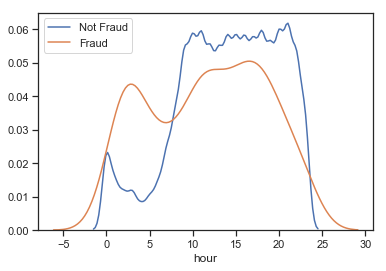

In [12]:
ch0 = Fraud_df[Fraud_df['Class']==0]['hour']
ch1 = Fraud_df[Fraud_df['Class']==1]['hour']
sns.distplot(ch0,hist=False,label='Not Fraud')
sns.distplot(ch1,hist=False,label='Fraud')
plt.legend()

## 2.Feature preprocessing

### 2.1 Data Transformation

In [13]:
Fraud_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,hour
count,"284,807.0000","284,807.0000","284,807.0000","284,807.0000","284,807.0000","284,807.0000","284,807.0000","284,807.0000","284,807.0000","284,807.0000",...,"284,807.0000","284,807.0000","284,807.0000","284,807.0000","284,807.0000","284,807.0000","284,807.0000","284,807.0000","284,807.0000","284,807.0000"
mean,"94,813.8596",0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,-0.0000,88.3496,0.0017,14.0465
std,"47,488.1460",1.9587,1.6513,1.5163,1.4159,1.3802,1.3323,1.2371,1.1944,1.0986,...,0.7257,0.6245,0.6056,0.5213,0.4822,0.4036,0.3301,250.1201,0.0415,5.8359
min,0.0000,-56.4075,-72.7157,-48.3256,-5.6832,-113.7433,-26.1605,-43.5572,-73.2167,-13.4341,...,-10.9331,-44.8077,-2.8366,-10.2954,-2.6046,-22.5657,-15.4301,0.0000,0.0000,0.0000
25%,"54,201.5000",-0.9204,-0.5985,-0.8904,-0.8486,-0.6916,-0.7683,-0.5541,-0.2086,-0.6431,...,-0.5424,-0.1618,-0.3546,-0.3171,-0.3270,-0.0708,-0.0530,5.6000,0.0000,10.0000
50%,"84,692.0000",0.0181,0.0655,0.1798,-0.0198,-0.0543,-0.2742,0.0401,0.0224,-0.0514,...,0.0068,-0.0112,0.0410,0.0166,-0.0521,0.0013,0.0112,22.0000,0.0000,15.0000
75%,"139,320.5000",1.3156,0.8037,1.0272,0.7433,0.6119,0.3986,0.5704,0.3273,0.5971,...,0.5286,0.1476,0.4395,0.3507,0.2410,0.0910,0.0783,77.1650,0.0000,19.0000
max,"172,792.0000",2.4549,22.0577,9.3826,16.8753,34.8017,73.3016,120.5895,20.0072,15.5950,...,10.5031,22.5284,4.5845,7.5196,3.5173,31.6122,33.8478,"25,691.1600",1.0000,23.0000


For Preprocessing the data, I have used Robust scaler, as it handles outliers better than standard scaler.<br>
For More Info:<br>
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html

In [14]:
X = Fraud_df.drop('Class',axis=1)
y = Fraud_df['Class']

transformer = RobustScaler()
trans_x = transformer.fit_transform(X)

Fraud_transDf = pd.DataFrame(data=trans_x,columns=X.columns)
Fraud_transDf['Class'] = y
Fraud_transDf.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,hour,Class
0,-0.9950,-0.6162,-0.0986,1.2289,0.8782,-0.2179,0.6312,0.1774,0.1424,0.3348,...,0.2531,-0.3208,0.0327,0.1676,-0.2412,0.8167,-0.2461,1.7833,-1.6667,0
1,-0.9950,0.5249,0.1431,-0.0070,0.2940,0.0877,0.1644,-0.1057,0.1171,-0.1645,...,-0.6027,0.3634,-0.4796,0.2255,0.3135,-0.0638,0.0265,-0.2698,-1.6667,0
2,-0.9950,-0.6156,-1.0024,0.8309,0.2510,-0.3443,1.7780,0.6682,0.4204,-1.1798,...,0.7143,2.9746,-0.9196,-0.5154,-0.1531,-0.3502,-0.5410,4.9837,-1.6667,0
3,-0.9950,-0.4402,-0.1788,0.8412,-0.5298,0.0338,1.3038,0.1756,0.6625,-1.0769,...,-0.0014,-0.5788,-1.5320,0.9445,-0.2990,0.3792,0.3826,1.4183,-1.6667,0
4,-0.9950,-0.5261,0.5792,0.7139,0.2656,-0.2707,0.3172,0.4916,-0.5465,0.7008,...,0.7391,-0.4080,0.1263,-0.3333,0.9762,1.3471,1.5537,0.6706,-1.6667,0


### 2.2 Correlation Analysis

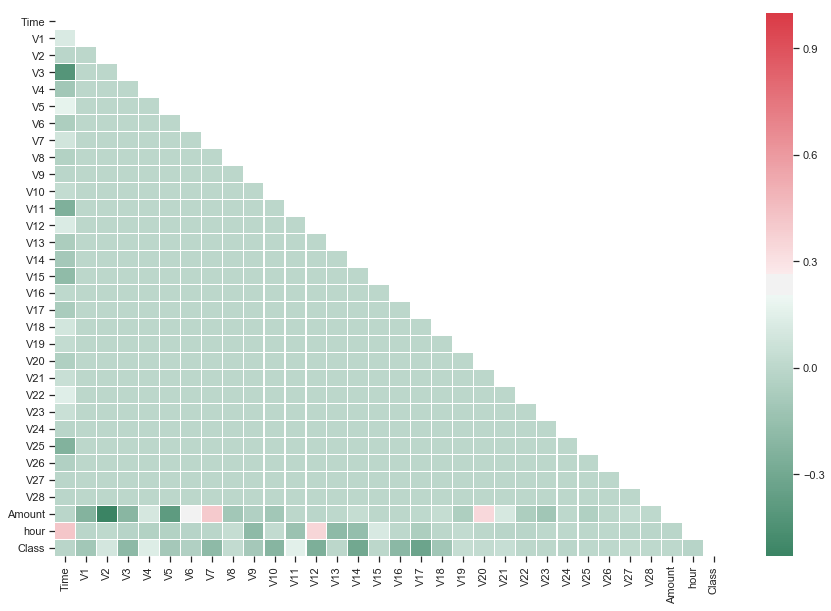

In [15]:
plt.figure(figsize=(15,10))

mask = np.zeros_like(Fraud_transDf.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(150, 10, as_cmap=True)
sns.heatmap(Fraud_transDf.corr(),linecolor='w',linewidths=0.2,cmap=cmap,mask=mask)

In [16]:
Fraud_transDf.corr()['Class'].apply(abs).sort_values(ascending=False)

Class    1.0000
V17      0.3265
V14      0.3025
V12      0.2606
V10      0.2169
V16      0.1965
V3       0.1930
V7       0.1873
V11      0.1549
V4       0.1334
V18      0.1115
V1       0.1013
V9       0.0977
V5       0.0950
V2       0.0913
V6       0.0436
V21      0.0404
V19      0.0348
V20      0.0201
V8       0.0199
V27      0.0176
hour     0.0171
Time     0.0123
V28      0.0095
V24      0.0072
Amount   0.0056
V13      0.0046
V26      0.0045
V15      0.0042
V25      0.0033
V23      0.0027
V22      0.0008
Name: Class, dtype: float64

__As we can see there is no strong correlation between Class & features,features V10,V12,V14,V17 show some negative coreelation__ 

###  2.3 Lets plot the anonimous features(v_)

/Users/suyashchavan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


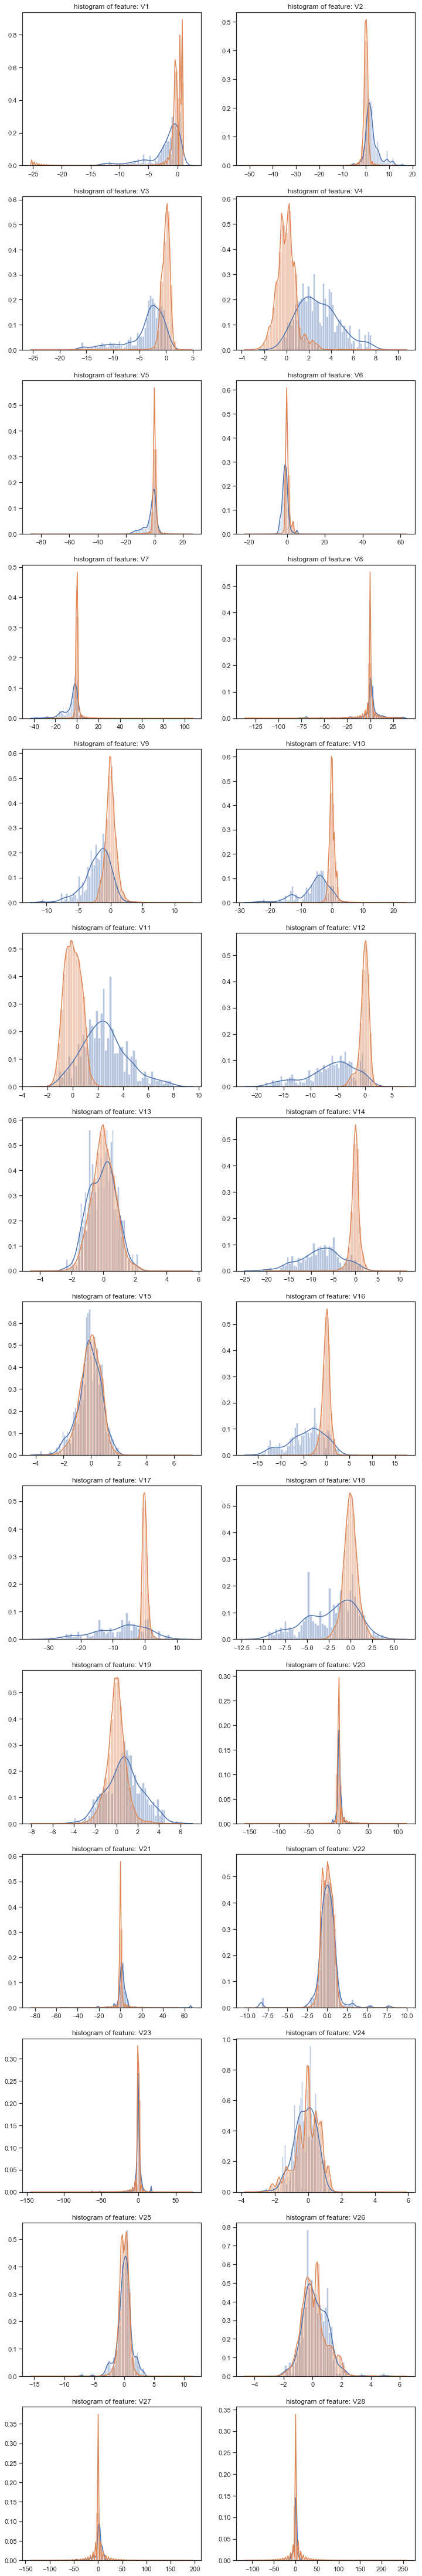

In [17]:
v_features = Fraud_transDf.ix[:,1:29].columns

plt.figure(figsize=(12,20*4))
gs = GridSpec(14, 2)
for i, cn in enumerate(Fraud_transDf[v_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(Fraud_transDf[cn][Fraud_transDf.Class == 1], bins=50)
    sns.distplot(Fraud_transDf[cn][Fraud_transDf.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

#### Features V8,V15,V20,V22,V23,V25,V26,V27,V28 HAVE IDENTICAL DISTRIBUTION ACROSS CLASS 0. AND CLASS 1, SO ITS BETTER TO DROP THESE COLUMNS

In [18]:
Fraud_transDf = Fraud_transDf.drop(['V8','V15','V20','V22','V23','V25','V26','V27','V28'],axis=1)

### 2.4 Splitting the Data-set

In [19]:
X = Fraud_transDf.drop('Class',axis=1)
y = Fraud_transDf['Class']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,stratify=y)

__The X_test,y_test data will be used for classification model evaluation in Step 5__

In [20]:
print('% of Fraud cases in training dataset is {}'.format(y_train.value_counts()[1]/len(y_train)*100))
print('% of Fraud cases in test dataset is {}'.format(y_test.value_counts()[1]/len(y_test)*100))

% of Fraud cases in training dataset is 0.17254870488152324
% of Fraud cases in test dataset is 0.17321489179921118


## Baseline Model

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85295
          1       0.86      0.61      0.71       148

avg / total       1.00      1.00      1.00     85443



Text(0.5, 0.98, 'Confusion Matrix')

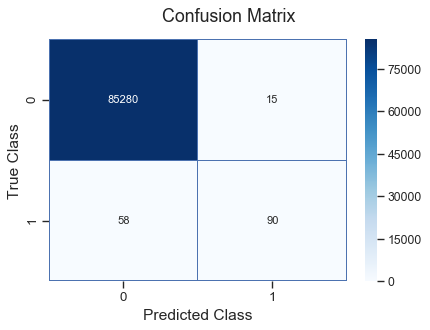

In [22]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

pred = lr.predict(X_test)
print(metrics.classification_report(y_test,pred))
cm=metrics.confusion_matrix(y_test,pred)

plt.figure(dpi=80)
sns.heatmap(cm,annot=True,fmt='g',cmap='Blues',linecolor='b',linewidths=0.2)
plt.ylabel('True Class',fontsize=14)
plt.yticks(fontsize=12)
plt.xlabel('Predicted Class',fontsize=14)
plt.xticks(fontsize=12)
plt.suptitle('Confusion Matrix',fontsize=16)



### Out of 148 Fraud cases, the Baseline model was able to identify 90 cases i.e. recall of 0.61 on Fraud Cases

# 3. Building Classification Models

## Defining the functions

#### Our main classifying function will consist of function to search best model parameters i.e. Hyperparameter tuning & Model Selection and function to plot confusion matrix, so first we define these two functions first

### 3.1 HyperParameter tuning and model selection function

In [23]:
# f1 scoring function
f1 = metrics.make_scorer(metrics.f1_score,average='weighted')

In [24]:
def optimizer(clf,parameters,X,y,n_folds=5):
    """
    Funtion optimizer
    ------------------------
    This function perform cross-validation using Grid search and is used for hyperparameter tuning
    and model selection. This function is called in the classify function which performs the 
    classification. 
    
    Parameters
    ------------------------
    clf          : The classifier
    parameters   : A dictionary of parameters on which grid search is to be performed
    X            : Dataframe of features
    y            : A Dataframe of responses/target
    n_folds      : Number of folds for cross-validation

    Returns
    -------------------------
    best_estimator : The best hyperparameters for the classifier
    """
    
    cv = KFold(n=X.shape[0],n_folds=n_folds,shuffle=True)
    
    grid = GridSearchCV(estimator=clf,param_grid=parameters,cv=cv,n_jobs=-1,scoring=f1)
    
    grid.fit(X,y)
    
    print("Most Accurate Model:{} \nScore:{}".format(grid.best_params_,grid.best_score_))
    
    best_estimator = grid.best_estimator_
    
    return best_estimator

In [25]:
def plot_confusion_matrix(cm):
    
    plt.figure(dpi=80)
    sns.heatmap(cm,annot=True,fmt='g',cmap='Blues',linecolor='b',linewidths=0.2)
    plt.ylabel('True Class',fontsize=14)
    plt.yticks(fontsize=12)
    plt.xlabel('Predicted Class',fontsize=14)
    plt.xticks(fontsize=12)
    plt.suptitle('Confusion Matrix',fontsize=16)

## 3.3 Classifier

In [26]:
def classify(clf,parameters,X_train,X_test,y_train,y_test,n_folds=5):
    """
    Funtion classify
    ------------------------
    This function performs classification using the best hyperparameters, which are determined
    using optimizer and then tests the model on the test set. This function prints the training
    and test accuracy of the classifier and plots the confusion matrix.
    
    Parameters
    ------------------------
    clf          : The classifier
    parameters   : A dictionary of parameters on which grid search is to be performed
    Xtrain       : Train Dataframe of features
    Xtest        : Test Dataframe of features
    ytrain       : Train Dataframe of responses/target
    ytest        : Test Dataframe of responses/target
    n_folds      : Number of Cross-Valiation folds
    
    
    Returns
    -------------------------
    Prints the training and test accuracy.
    Prints Classification Report.
    Plots the confusion matrix.
    
    """
    
    ## step-1. Hyperparameter tuning and model selection
    
    clf = optimizer(clf,parameters,X_train,y_train,n_folds=n_folds)  # Returns best estimator
    
    # Fitting the Tuned classifier
    clf.fit(X_train,y_train)
    
    # Calculate Training Accuracy
    Training_accuracy = clf.score(X_train,y_train)
    
    # Calculate Test Accuracy
    Test_accuracy = clf.score(X_test,y_test)
    
    print('\n')
    print('Training Accuracy: {}'.format(Training_accuracy))
    print('\n')
    print('Test Accuracy: {}'.format(Test_accuracy))
    print('\n')
    
    
    # Confusion Matrix
    
    cm = metrics.confusion_matrix(y_test,clf.predict(X_test))
    plot_confusion_matrix(cm)                                       # Calling the function confusion matrix
    
    # Classification Report:
    
    print(metrics.classification_report(y_test,clf.predict(X_test)))
    

# 4.Resampling Methods 

### We will Use 2 undersampling, 2 oversampling and 1 combine sampling methods

 __Undersampling__ <br> 1.Random Undersampling<br>  2.Nearmiss(version-2)<br> 
***
 __Oversampling__ <br> 1.Random Oversampling<br>     2.SMOTE<br> 
***
 __Combine Sampling Methods__<br> 1.SMOTEENN

## 4.1 Defining Functions for resampling

In [35]:
def RUS_(X_train,y_train,r=0.5):
    
    """
    Funtion RUS_
    -----------------------------
    This function performs Random Under Sampling without replacement on the data.
    
    Parameters
    ------------------------
    
    X_train         : Dataframe containing only training features
    y_train         : A dataframe of training responses
    r               : A ratio specifying the ratio between the two classes(Minority/Majority)
    
    Returns
    -------------------------
    X_train_RUS : Training Dataframe of features and target 'Class' 
    
    """
    sampler = RandomUnderSampler(ratio=r,random_state=101)
    X_train_RUS,y_train_RUS = sampler.fit_sample(X_train,y_train)
    
    X_Train_RUS = pd.DataFrame(data=X_train_RUS,columns=X.columns)
    X_Train_RUS['Class'] = y_train_RUS
    
    return X_Train_RUS
    
    
    

In [36]:
def NearMiss_(X_train,y_train,r=0.5,neighbours = 3):
    
    
    """
    Funtion NearMiss_
    -----------------------------
    This function performs Random Under Sampling without replacement on the data.
    
    Parameters
    ------------------------
    
    X_train         : Dataframe containing only training features
    y_train         : A dataframe of training responses
    r               : A ratio specifying the ratio between the two classes(Minority/Majority)
    neighbours      : Size of neighbourhood to consider
    Returns
    -------------------------
    X_train_NM : Training Dataframe of features and target 'Class' 
    
    """
        
    sampler = NearMiss(ratio = r , version=2,size_ngh=neighbours,random_state=101)
    X_train_NM, y_train_NM = sampler.fit_sample(X_train,y_train)
    
    X_Train_NM = pd.DataFrame(data=X_train_RUS,columns = X.columns)
    X_Train_NM['Class'] = y_train_NM
    
    return X_Train_NM
    

In [37]:
def ROS_(X_train,y_train,r=0.5):
    
    """
    Funtion ROS_
    -----------------------------
    This function performs Random over Sampling of data
    
    Parameters
    ------------------------
    
    X_train         : Dataframe containing only training features
    y_train         : A dataframe of training responses
    r               : A ratio specifying the ratio between the two classes(Minority/Majority)
    
    Returns
    -------------------------
    X_train_ROS : Training Dataframe of features and target 'Class' 
    
    """
    sampler = RandomOverSampler(ratio=r,random_state=101)
    X_train_ROS,y_train_ROS = sampler.fit_sample(X_train,y_train)
    
    X_Train_ROS = pd.DataFrame(data=X_train_ROS,columns=X.columns)
    X_Train_ROS['Class'] = y_train_ROS
    
    return X_Train_ROS
    
    

In [42]:
def SMOTE_(X_train,y_train,r=0.5):
    """
    Funtion SMOTE
    -----------------------------
    This function performs SMOTE on the data.
    
    Parameters
    ------------------------
    X_train         : Dataframe containing only training features
    y_train         : A dataframe of training responses
    r               : A ratio specifying the ratio between the two classes(Minority/Majority)
    
    
    Returns
    -------------------------
    X_Train_SMOTE : Training Dataframe of features and target 'Class'
    
    """
    
    sampler = SMOTE(ratio=r,random_state=101)
    X_train_SMOTE,y_train_SMOTE = sampler.fit_sample(X_train,y_train)
    
    X_Train_SMOTE = pd.DataFrame(data=X_train_SMOTE,columns=X.columns)
    X_Train_SMOTE['Class'] = y_train_SMOTE
    
    return X_Train_SMOTE

In [43]:
def SMOTEENN_(X_train,y_train,r=0.5, neighbours =5):
    """
    Funtion SMOTEENN_
    -----------------------------
    This function performs SMOTEENN on the data.
    
    Parameters
    ------------------------
    X_train         : Dataframe containing only training features
    y_train         : A dataframe of training responses
    r               : A ratio specifying the ratio between the two classes(Minority/Majority)
    neighbours      : Number of nearest neighbours considered to construct synthetic samples
    
    Returns
    -------------------------
    X_Train_SMOTEENN : Training Dataframe of features and target 'Class'
    
    """
    
    sampler = SMOTEENN(ratio=r,k=neighbours,size_ngh=neighbours,random_state=101)
    
    X_train_SMOTEENN, y_train_SMOTEENN = sampler.fit_sample(X_train,y_train)
    
    X_Train_SMOTEENN = pd.DataFrame(data=X_train_SMOTEENN,columns=X.columns)
    X_Train_SMOTEENN['Class'] = y_train_SMOTEENN
    
    return X_Train_SMOTEENN

## 4.2 Constructing the Resampled data-sets
#### We have used 3/2 ratio of majority/Minority class, but we can change it ( r= .f )but default is 3/2 ratio

In [44]:
## Random Undersampling
X_train_RUS = RUS_(X_train,y_train)

## NearMiss(Version-2)
X_train_NearMiss = NearMiss_(X_train,y_train)

## Random Oversampling
X_train_ROS = ROS_(X_train,y_train)

## SMOTE
X_train_SMOTE = SMOTE_(X_train,y_train)

## Combine
X_train_SMOTEENN = SMOTEENN_(X_train,y_train)


/Users/suyashchavan/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/suyashchavan/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/suyashchavan/anaconda3/lib/python3.7/site-packages/imblearn/utils/deprecation.py:50: DeprecationWarning: 'size_ngh' is deprecated from 0.2 and will be removed in 0.4. Use 'n_neighbors' instead.
  category=DeprecationWarning)
/Users/suyashchavan/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarnin

### 4.3 Plotting the resampled Targets

[Text(0.5, 1.0, 'SMOTEENN 3:2')]

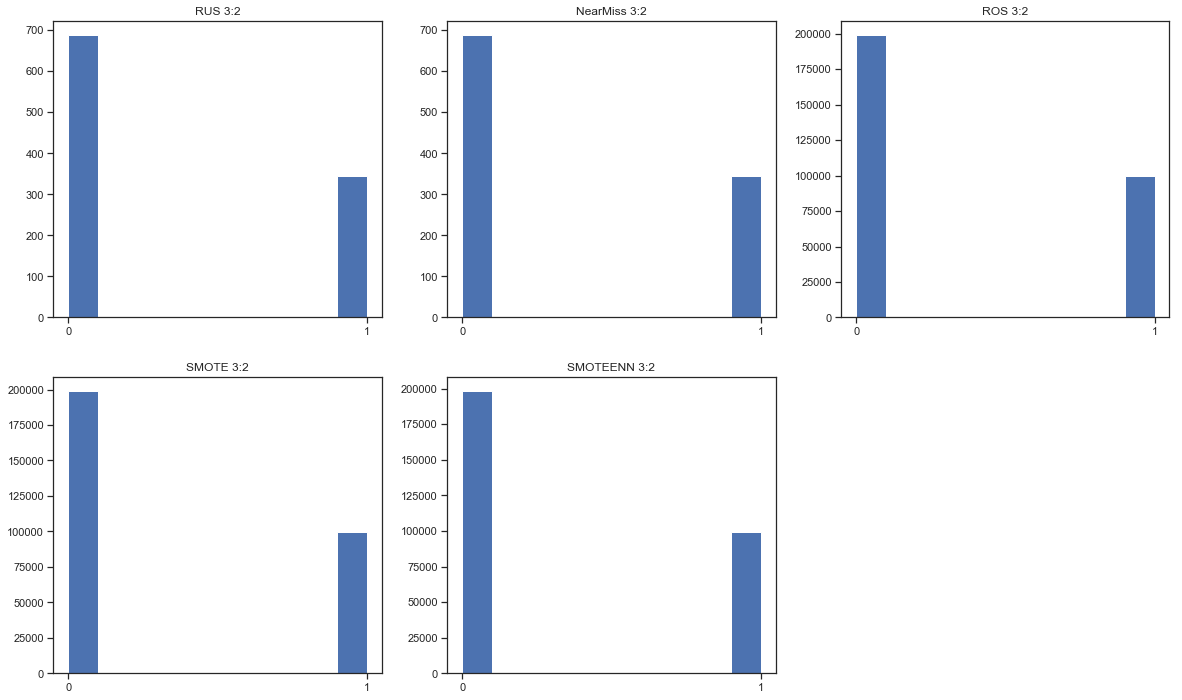

In [45]:
plt.figure(figsize=(20,12))
gs = GridSpec(2,3)

ax = plt.subplot(gs[0])
plt.hist(X_train_RUS['Class'])
plt.xticks(np.arange(0,2))
ax.set(title = 'RUS 3:2')


ax1 = plt.subplot(gs[1])
plt.hist(X_train_NearMiss['Class'])
plt.xticks(np.arange(0,2))
ax1.set(title = 'NearMiss 3:2')


ax2 = plt.subplot(gs[2])
plt.hist(X_train_ROS['Class'])
plt.xticks(np.arange(0,2))
ax2.set(title = 'ROS 3:2')


ax3 = plt.subplot(gs[3])
plt.hist(X_train_SMOTE['Class'])
plt.xticks(np.arange(0,2))
ax3.set(title = 'SMOTE 3:2')


ax4 = plt.subplot(gs[4])
plt.hist(X_train_SMOTEENN['Class'])
plt.xticks(np.arange(0,2))
ax4.set(title = 'SMOTEENN 3:2')

### 4.4 Spliting the Test Data in Feature and Target'Class'

In [46]:
# RUS
Xtrain_RUS = X_train_RUS.drop('Class',axis=1)
ytrain_RUS = X_train_RUS['Class']

# NearMiss
Xtrain_NearMiss = X_train_NearMiss.drop('Class',axis=1)
ytrain_NearMiss = X_train_NearMiss['Class']

# ROS
Xtrain_ROS = X_train_ROS.drop('Class',axis=1)
ytrain_ROS = X_train_ROS['Class']

# SMOTE
Xtrain_SMOTE = X_train_SMOTE.drop('Class',axis=1)
ytrain_SMOTE = X_train_SMOTE['Class']

# SMOTEENN
Xtrain_SMOTEENN = X_train_SMOTEENN.drop('Class',axis=1)
ytrain_SMOTEENN = X_train_SMOTEENN['Class']

# 5.Training & Evaluation of Classification models

### 5.1.1 Logistic Regression with RUS

Most Accurate Model:{'C': 0.1, 'penalty': 'l2'} 
Score:0.9540815827557934


Training Accuracy: 0.9593023255813954


Test Accuracy: 0.9782193977271397


             precision    recall  f1-score   support

          0       1.00      0.98      0.99     85295
          1       0.07      0.89      0.12       148

avg / total       1.00      0.98      0.99     85443

Time Taken: 3.073378086090088 sec


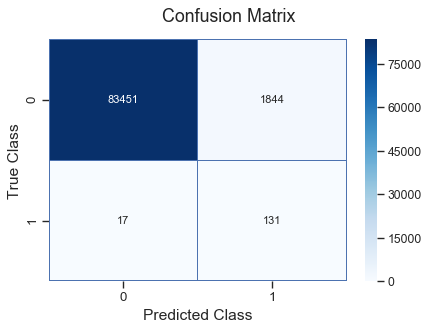

In [50]:
log_RUS = LogisticRegression(class_weight='balanced')

#Parameter for grid search

parameters = {'penalty':['l1','l2'],
             'C':[0.01,0.1,1,10,100]}

#Returns a Test result 
t0 = time.time()
classify(clf=log_RUS,parameters=parameters,X_train=Xtrain_RUS,X_test=X_test,y_train=ytrain_RUS,y_test=y_test)
t1= time.time()
print('Time Taken: {} sec'.format(t1-t0))

### 5.1.2 Logistic Regression with NearMiss

Most Accurate Model:{'C': 100, 'penalty': 'l1'} 
Score:0.956266551318746


Training Accuracy: 0.9612403100775194


Test Accuracy: 0.9716419133223319


             precision    recall  f1-score   support

          0       1.00      0.97      0.99     85295
          1       0.05      0.90      0.10       148

avg / total       1.00      0.97      0.98     85443

Time Taken: 3.1228530406951904 sec


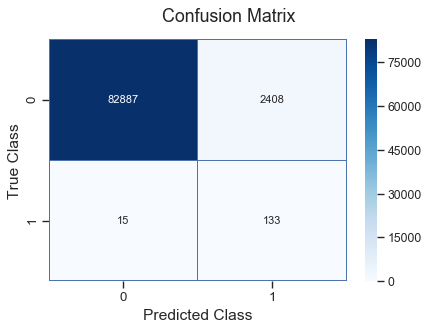

In [51]:
log_NM = LogisticRegression(class_weight='balanced')

#Parameter for grid search

parameters = {'penalty':['l1','l2'],
             'C':[0.01,0.1,1,10,100]}
#Returns a Test result 
t0 = time.time()
classify(clf=log_NM,parameters=parameters,X_train=Xtrain_NearMiss,X_test=X_test,y_train=ytrain_NearMiss,y_test=y_test)
t1= time.time()
print('Time Taken: {} sec'.format(t1-t0))

### 5.1.3 Logistic Regression with ROS

Most Accurate Model:{'C': 10, 'penalty': 'l1'} 
Score:0.9574609034631268


Training Accuracy: 0.9578467825679161


Test Accuracy: 0.9760308041618388


             precision    recall  f1-score   support

          0       1.00      0.98      0.99     85295
          1       0.06      0.89      0.11       148

avg / total       1.00      0.98      0.99     85443

Time Taken: 58.84794902801514 sec


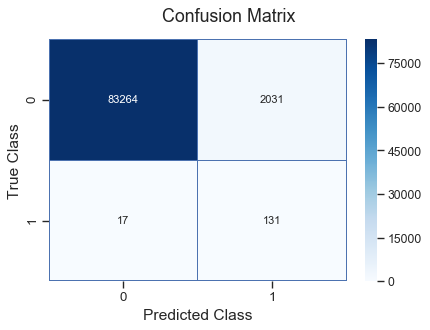

In [52]:
log_ROS = LogisticRegression(class_weight='balanced')

#Parameter for grid search

parameters = {'penalty':['l1','l2'],
             'C':[0.01,0.1,1,10,100]}
#Returns a Test result 
t0 = time.time()
classify(clf=log_ROS,parameters=parameters,X_train=Xtrain_ROS,X_test=X_test,y_train=ytrain_ROS,y_test=y_test)
t1= time.time()
print('Time Taken: {} sec'.format(t1-t0))

### 5.1.4 Logistic Regression with SMOTE

Most Accurate Model:{'C': 0.01, 'penalty': 'l2'} 
Score:0.9577590255171107


Training Accuracy: 0.9578903292801394


Test Accuracy: 0.9753753964631392


             precision    recall  f1-score   support

          0       1.00      0.98      0.99     85295
          1       0.06      0.89      0.11       148

avg / total       1.00      0.98      0.99     85443

Time Taken: 61.53954601287842 sec


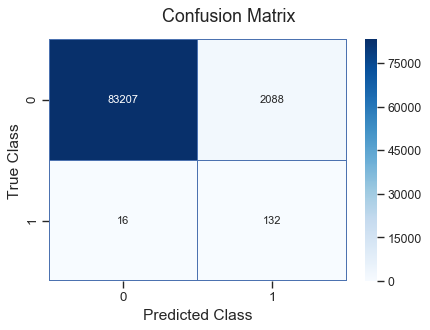

In [53]:
log_SMOTE = LogisticRegression(class_weight='balanced')

#Parameter for grid search

parameters = {'penalty':['l1','l2'],
             'C':[0.01,0.1,1,10,100]}
#Returns a Test result 
t0 = time.time()
classify(clf=log_SMOTE,parameters=parameters,X_train=Xtrain_SMOTE,X_test=X_test,y_train=ytrain_SMOTE,y_test=y_test)
t1= time.time()
print('Time Taken: {} sec'.format(t1-t0))

### 5.1.5 Logistic Regression with SMOTEENN

Most Accurate Model:{'C': 100, 'penalty': 'l2'} 
Score:0.9603631287902427


Training Accuracy: 0.9605097936517529


Test Accuracy: 0.9746497665110073


             precision    recall  f1-score   support

          0       1.00      0.97      0.99     85295
          1       0.06      0.89      0.11       148

avg / total       1.00      0.97      0.99     85443

Time Taken: 226.97956681251526 sec


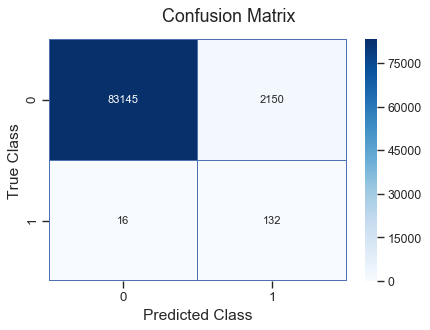

In [54]:
log_SMOTEENN = LogisticRegression(class_weight='balanced')

#Parameter for grid search

parameters = {'penalty':['l1','l2'],
             'C':[0.01,0.1,1,10,100]}

#Returns a Test result 
t0 = time.time()
classify(clf=log_SMOTEENN,parameters=parameters,X_train=Xtrain_SMOTEENN,X_test=X_test,y_train=ytrain_SMOTEENN,y_test=y_test)
t1= time.time()
print('Time Taken: {} sec'.format(t1-t0))

### 5.2.1 Random Forest with RUS

Most Accurate Model:{'max_features': 'log2', 'n_estimators': 300} 
Score:0.9567113506566712


Training Accuracy: 1.0


Test Accuracy: 0.9936565897732992


             precision    recall  f1-score   support

          0       1.00      0.99      1.00     85295
          1       0.20      0.87      0.32       148

avg / total       1.00      0.99      1.00     85443

Time Taken: 23.66431999206543 sec


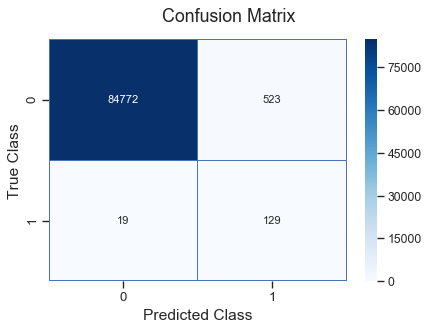

In [55]:
rfc_RUS = RandomForestClassifier(class_weight='balanced')

parameters = {'n_estimators':[100,300,500,700,1000],
             'max_features':['sqrt','log2']}

t0 = time.time()
classify(rfc_RUS,parameters=parameters,X_train=Xtrain_RUS,X_test=X_test,y_train=ytrain_RUS,y_test=y_test)
t1= time.time()
print('Time Taken: {} sec'.format(t1-t0))

### 5.2.2 Random Forest with NearMiss

Most Accurate Model:{'max_features': 'sqrt', 'n_estimators': 100} 
Score:0.9556697301604293


Training Accuracy: 1.0


Test Accuracy: 0.9944641456877684


             precision    recall  f1-score   support

          0       1.00      0.99      1.00     85295
          1       0.22      0.86      0.35       148

avg / total       1.00      0.99      1.00     85443

Time Taken: 17.508745908737183 sec


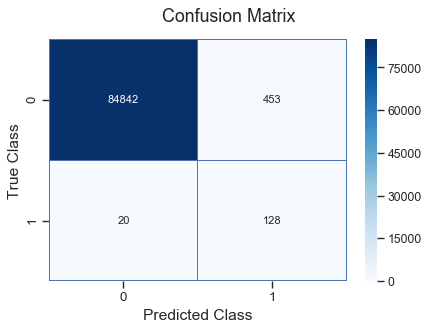

In [56]:
rfc_NM = RandomForestClassifier(class_weight='balanced')

parameters = {'n_estimators':[100,300,500,700,1000],
             'max_features':['sqrt','log2']}

t0 = time.time()
classify(rfc_NM,parameters=parameters,X_train=Xtrain_NearMiss,X_test=X_test,y_train=ytrain_NearMiss,y_test=y_test)
t1= time.time()
print('Time Taken: {} sec'.format(t1-t0))

### 5.2.3 Random Forest with ROS

Most Accurate Model:{'max_features': 'sqrt', 'n_estimators': 300} 
Score:0.9999397061618297


Training Accuracy: 1.0


Test Accuracy: 0.9995552590615966


             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85295
          1       0.94      0.80      0.86       148

avg / total       1.00      1.00      1.00     85443

Time Taken: 6641.577525138855 sec


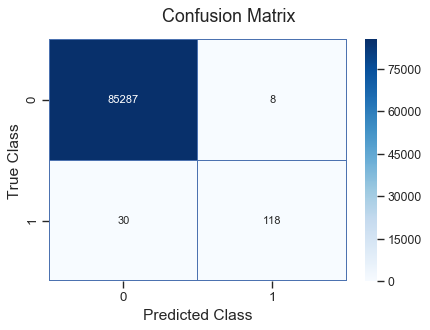

In [57]:
rfc_ROS = RandomForestClassifier(class_weight='balanced')

parameters = {'n_estimators':[100,300,500,700,1000],
             'max_features':['sqrt','log2']}

t0 = time.time()
classify(rfc_ROS,parameters=parameters,X_train=Xtrain_ROS,X_test=X_test,y_train=ytrain_ROS,y_test=y_test)
t1= time.time()
print('Time Taken: {} sec'.format(t1-t0))

### 5.2.4 Random Forest with SMOTE

Most Accurate Model:{'max_features': 'log2', 'n_estimators': 100} 
Score:0.9998727145175214


Training Accuracy: 1.0


Test Accuracy: 0.9995435553526912


             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85295
          1       0.91      0.82      0.86       148

avg / total       1.00      1.00      1.00     85443

Time Taken: 9107.724733114243 sec


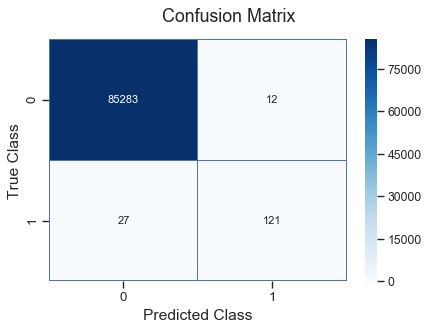

In [58]:
rfc_SMOTE = RandomForestClassifier(class_weight='balanced')

parameters = {'n_estimators':[100,300,500,700,1000],
             'max_features':['sqrt','log2']}

t0 = time.time()
classify(rfc_SMOTE,parameters=parameters,X_train=Xtrain_SMOTE,X_test=X_test,y_train=ytrain_SMOTE,y_test=y_test)
t1= time.time()
print('Time Taken: {} sec'.format(t1-t0))

### 5.2.5 Random Forest with SMOTEENN

Most Accurate Model:{'max_features': 'sqrt', 'n_estimators': 300} 
Score:0.9999664256828169


Training Accuracy: 1.0


Test Accuracy: 0.9994148145547324


             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85295
          1       0.83      0.83      0.83       148

avg / total       1.00      1.00      1.00     85443

Time Taken: 8320.902981042862 sec


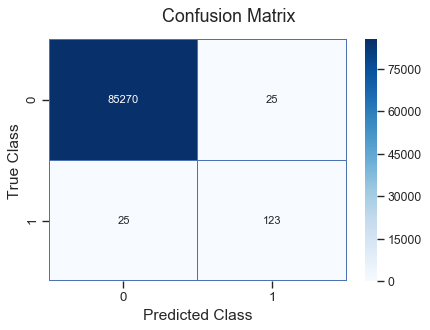

In [59]:
rfc_SMOTEENN = RandomForestClassifier(class_weight='balanced')

parameters = {'n_estimators':[100,300,500,700,1000],
             'max_features':['sqrt','log2']}

t0 = time.time()
classify(rfc_SMOTEENN,parameters=parameters,X_train=Xtrain_SMOTEENN,X_test=X_test,y_train=ytrain_SMOTEENN,y_test=y_test)
t1= time.time()
print('Time Taken: {} sec'.format(t1-t0))

### 5.3.1 Support Vector Machine with RUS

/Users/suyashchavan/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/suyashchavan/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Most Accurate Model:{'C': 50, 'degree': 2, 'gamma': 1, 'kernel': 'linear'} 
Score:0.957316765133316


Training Accuracy: 0.9631782945736435


Test Accuracy: 0.9701906534180682


             precision    recall  f1-score   support

          0       1.00      0.97      0.98     85295
          1       0.05      0.89      0.09       148

avg / total       1.00      0.97      0.98     85443

Time Taken: 234.38458395004272 sec


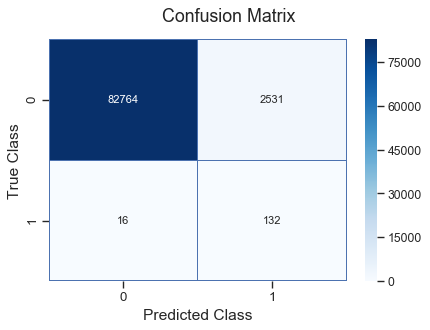

In [60]:
svc_RUS = SVC(class_weight='balanced')

parameters = {'C':[1,5,10,50,100,1000],
             'kernel':['linear','poly','rbf'],
             'degree':[2,3],
             'gamma':[1,0.1,0.01,0.001,0.0001]}
t0 = time.time()
classify(svc_RUS,parameters=parameters,X_train=Xtrain_RUS,X_test=X_test,y_train=ytrain_RUS,y_test=y_test)
t1= time.time()
print('Time Taken: {} sec'.format(t1-t0))

### 5.3.2 Support Vector Machine with NearMiss

/Users/suyashchavan/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/suyashchavan/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/suyashchavan/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Most Accurate Model:{'C': 10, 'degree': 2, 'gamma': 1, 'kernel': 'linear'} 
Score:0.9543551371995501


Training Accuracy: 0.9631782945736435


Test Accuracy: 0.9705183572674181


             precision    recall  f1-score   support

          0       1.00      0.97      0.99     85295
          1       0.05      0.89      0.09       148

avg / total       1.00      0.97      0.98     85443

Time Taken: 156.5434262752533 sec


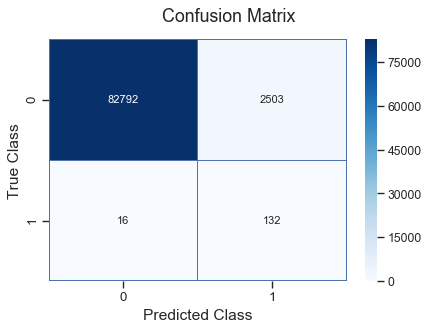

In [61]:
svc_NM = SVC(class_weight='balanced')
parameters = {'C':[1,5,10,50,100,1000],
             'kernel':['linear','poly','rbf'],
             'degree':[2,3],
             'gamma':[1,0.1,0.01,0.001,0.0001]}
t0 = time.time()
classify(svc_NM,parameters=parameters,X_train=Xtrain_NearMiss,X_test=X_test,y_train=ytrain_NearMiss,y_test=y_test)
t1= time.time()
print('Time Taken: {} sec'.format(t1-t0))

__The SVM classifier models with Oversampling datasets where taking too much time(estimated more than 6 hours), so right now I have decided not to use them, in future with higher processing capabilities I will surely work on them, but right now I have decided to leave them__

## 5.4 Inference from Classification Model results

__For Credit Card fraud detection, the model should have higher recall on minority class, in our case it is Class '1' and higher precision on majority class i.e. Class'0'__<br>
***
__The model Logistic regression with Nearmiss sampling gives the best result.__<br>__Recall on Class 1: 0.90__<br>__precision on Class 0: 1.00__
***
__Precision of the model is low on Class 1(0.05), but it is better to have a conservative approach in Fraud Detection, because we dont want to miss out on True Fraud cases__

## 5.5 Model Assessment 

***
__We need to Check if the Best performing model is overfitting or not, We got 0.96 Training accuracy and 0.97 test accuracy, very low Training and Test accuracy difference shows Model is not overfitting, but just to make sure I  will check Precision-Recall Curve and average precision score__
***
__The reason I am using Precision recall curve instead on ROC curve is because of highly imbalanced test dataset, and in that case precision recall curve is more accurate for model assesment__

In [62]:
## Fit the best model

clf_NM = LogisticRegression(C=100,penalty='l1')
clf_NM.fit(Xtrain_NearMiss,ytrain_NearMiss)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [63]:
print(metrics.classification_report(y_test,clf_NM.predict(X_test)))

             precision    recall  f1-score   support

          0       1.00      0.98      0.99     85295
          1       0.08      0.89      0.15       148

avg / total       1.00      0.98      0.99     85443



In [64]:
y_scores = clf_NM.decision_function(X_test)

precisions,recalls,thresholds = metrics.precision_recall_curve(y_test,y_scores)
avg = metrics.average_precision_score(y_test,y_scores)

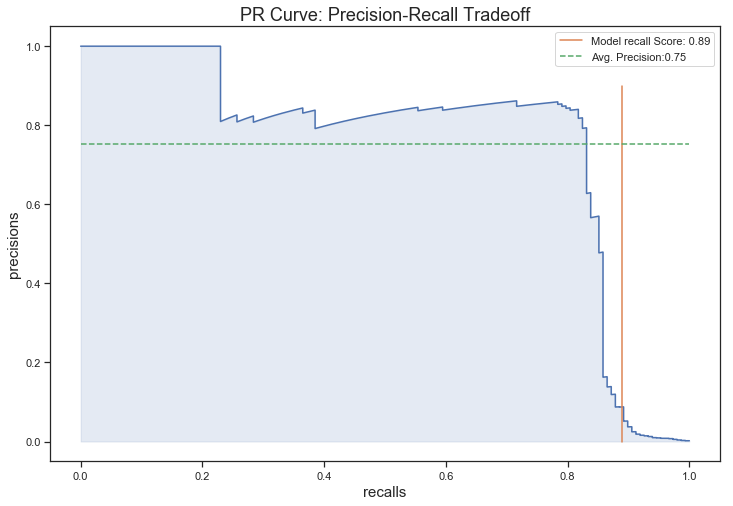

In [67]:
plt.figure(figsize=(12,8)) 
plt.plot(recalls, precisions)
plt.fill_between(recalls, precisions, color='b', alpha=0.15)
plt.plot([0.89,0.89],[0,0.9],label='Model recall Score: 0.89')
plt.plot([0,1],[avg,avg],ls='--',label = 'Avg. Precision:{:.2f}'.format(avg))
plt.xlabel('recalls',fontsize=15)
plt.ylabel('precisions',fontsize=15)
plt.title('PR Curve: Precision-Recall Tradeoff',fontsize=18)
plt.legend(loc='upper right')

__From Precision-recall curve we can clearly see that,the model is little conservative as it is shifted little right to the steep fall from precision so it is predicting more Class 0 observations as Class 1,because of which we sacrifice precision but thats ok as we can predict more actual Fraud cases correctly.__<br>

## 5.6 Feature importance

To find out important feature, I have used Best random forest model, as it is easy to get to know about important features using random forest

In [72]:
rfc = RandomForestClassifier(class_weight='balanced',n_estimators=300,max_features='log2')
rfc.fit(Xtrain_RUS,ytrain_RUS)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='log2',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

Text(0.5, 0.98, 'Feature Importance')

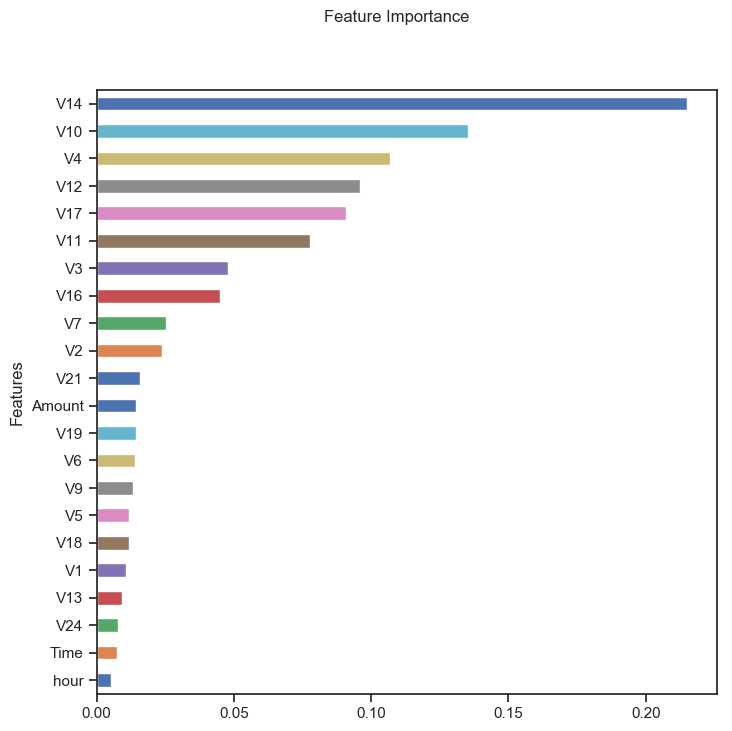

In [88]:
plt.figure(figsize=(8,8),dpi=100)
feat_importances = pd.Series(rfc.feature_importances_, index=Xtrain_RUS.columns)
feat_importances.nsmallest(25).plot(kind='barh')
plt.ylabel('Features')
plt.suptitle('Feature Importance')

__As we have seen in section 2.2 Correlation Analysis, Features with high negative correlation with class dominates the prediction of classes__<br>
__In Section 2.3 as well we can see there is clear difference in distribution plots of classes for these features.__

## 6. Future work-scope

__1.The main aim of the project has been to detect maximum number of Frauds, in technical term to achieve maximum recall on Minority Class 1,
but Fraud also comes with monetory loss so we can use cost sensitive training for classification model.__<br>
***
__2.A false positive error will result in possible loss of customer and false negative error will result in financial loss to the company, so we can use cost function for hyper parameter tuning to optimize the loss.__<br>
***
__3.The model whose prediction produces minimum loss is chosen.__